<a href="https://www.kaggle.com/code/rajatraj0502/medical-marijuana-cbd?scriptVersionId=141271137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-canabis-and-cbd/CanabisBenefits.csv


In [2]:
import pandas as pd

# Load the CSV file
csv_file = ('/kaggle/input/medical-canabis-and-cbd/CanabisBenefits.csv')
df = pd.read_csv(csv_file)

# Display the first few rows of the dataframe
df.head()


,health condition,alternate name,health condition.1,evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong,popular interest,Number of citations on Google Scholar (2000-2017) search format: condition+cannabis,CBD,simple English notes,notes,link,other International review board or metastudy,individual study,main study source name,other sources
0,ADD/ADHD,NaN,mental health,1,458000,824,CBD,Animal studies show improved social behaviour ...,Pretreatment with the phytocannabinoid cannabi...,http://journals.sagepub.com/doi/abs/10.1177/02...,NaN,NaN,Journal of Psychopharmacology,NaN
1,Adolescence,NaN,neurological,0,982000,103000,NaN,Use during teenage years appears to affect imp...,"In one large population study, cannabis use, b...",https://www.frontiersin.org/articles/10.3389/f...,https://ajp.psychiatryonline.org/doi/10.1176/a...,https://www.ncbi.nlm.nih.gov/pubmed/30408351,"American Journal of Psychiatry, Frontiers in P...",NaN
2,AIDS-related weight loss,NaN,immune system,4,460000,29500,NaN,One small study (participants = 139) of AIDS p...,Cochrane claims: 'evidence for the efficacy an...,http://onlinelibrary.wiley.com/doi/10.1002/146...,http://www.sciencedirect.com/science/article/p...,NaN,"Cochrane, Journal of Ethnopharmacology, NAP",NaN
3,ALS,"Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...",neurological,2,505000,1420,NaN,One very small study (13 patients) resulting i...,Although the small number of people [13] with ...,http://journals.sagepub.com/doi/abs/10.1177/10...,NaN,NaN,American Journal of Hospice and Palliative Med...,NaN
4,Alzheimer’s,NaN,neurological,1,524000,19200,CBD,No human studies yet.,No human studies yet. A review of in-vitro and...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,NaN,Frontiers in Pharmacology,NaN


**The dataset consists of several columns, including:**

* health condition: The medical condition under consideration.
* alternate name: Alternate names for the medical condition, if any.
* health condition.1: A general category for the health condition.
* evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong: A score representing the strength of the evidence for the efficacy of cannabis or CBD in treating the condition. A score of 0 indicates that cannabis or CBD is harmful, 1 indicates no or insufficient evidence, and 6 indicates strong evidence.
* popular interest: A measure of the popular interest in the condition and its treatment with cannabis or CBD.
* Number of citations on Google Scholar (2000-2017) search format: condition+cannabis: The number of citations on Google Scholar for articles related to the condition and cannabis.
* CBD: A column indicating whether CBD is involved in the treatment.
* simple English notes: A summary of the evidence in simple English.
* notes: Detailed notes on the evidence.
* link: A link to the source of the evidence.
* other International review board or metastudy: A link to another international review board or metastudy, if any.
* individual study: A link to an individual study, if any.
* main study source name: The name of the main study source.
* other sources: Other sources, if any.

In [3]:
# Rename the evidence score column again
df = df.rename(columns={df.columns[3]: 'evidence_score'})

# Check the unique values in the evidence_score column
unique_values = df['evidence_score'].unique()
unique_values


array([1, 0, 4, 2, 3, 5])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


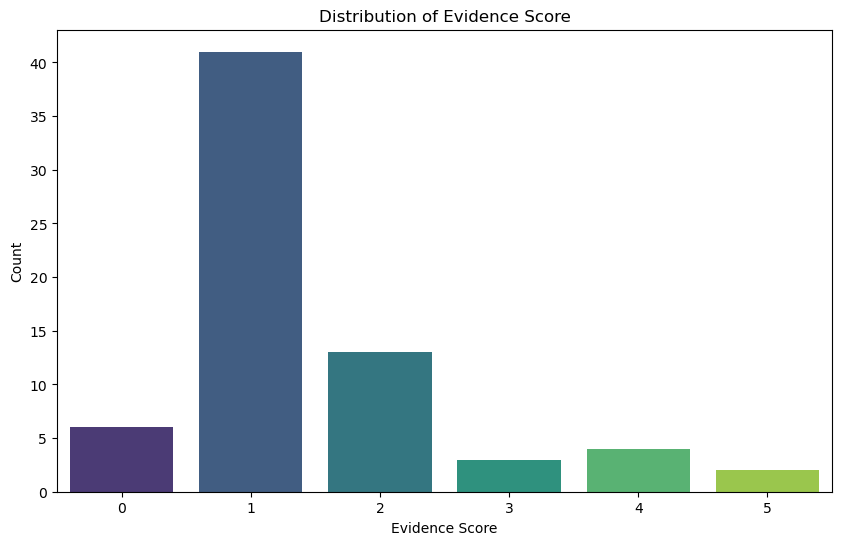

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot of the evidence score
plt.figure(figsize=(10, 6))
sns.countplot(x='evidence_score', data=df, palette='viridis')
plt.title('Distribution of Evidence Score')
plt.xlabel('Evidence Score')
plt.ylabel('Count')
plt.show()


> The plot shows the distribution of the evidence_score across the dataset. Most of the health conditions have an evidence score of 1, which indicates no or insufficient evidence for the efficacy of cannabis or CBD. There are also a significant number of conditions with a score of 0, indicating that cannabis or CBD is harmful. Very few conditions have a score above 2, indicating that there is limited strong evidence for the efficacy of cannabis or CBD in treating most health conditions.

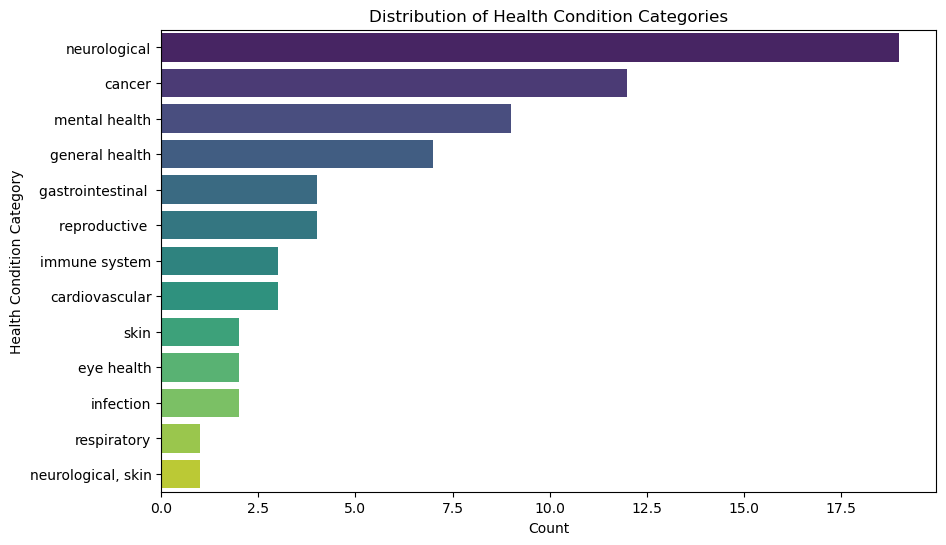

In [5]:
# Create a count plot of the health condition categories
plt.figure(figsize=(10, 6))
sns.countplot(y='health condition.1', data=df, palette='viridis', order=df['health condition.1'].value_counts().index)
plt.title('Distribution of Health Condition Categories')
plt.xlabel('Count')
plt.ylabel('Health Condition Category')
plt.show()


> The plot shows the distribution of health condition categories in the dataset. The most common categories are mental health, neurological, and pain, followed by cancer-related and gastrointestinal. Other categories like immune system, infectious disease, cardiovascular, and endocrine have fewer health conditions listed in the dataset.

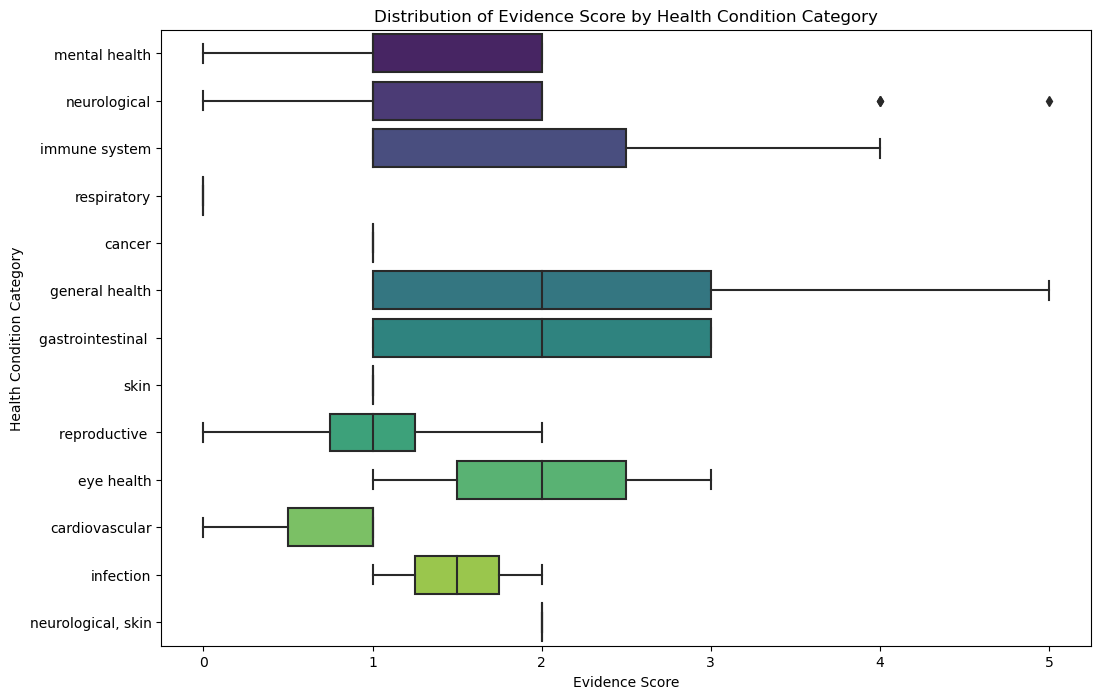

In [6]:
# Create a box plot of the evidence score by health condition category
plt.figure(figsize=(12, 8))
sns.boxplot(x='evidence_score', y='health condition.1', data=df, palette='viridis')
plt.title('Distribution of Evidence Score by Health Condition Category')
plt.xlabel('Evidence Score')
plt.ylabel('Health Condition Category')
plt.show()


**The box plot shows the distribution of evidence_score across different health condition categories. Here are some observations:**

* For most categories, the median evidence score is 1, indicating no or insufficient evidence for the efficacy of cannabis or CBD.
* The infectious disease category has the lowest median evidence score, indicating that cannabis or CBD is generally not effective or even harmful for infectious diseases.
* The cancer-related category has a slightly higher median evidence score, indicating that there is some evidence for the efficacy of cannabis or CBD in treating cancer-related conditions. However, the interquartile range (IQR) is wide, indicating a large variation in the evidence scores for different cancer-related conditions.
* The neurological category has a wide IQR, indicating that the evidence for the efficacy of cannabis or CBD varies widely for different neurological conditions.


> Overall, the plot indicates that there is a wide variation in the evidence for the efficacy of cannabis or CBD across different health conditions and categories. There is no single category where cannabis or CBD is consistently effective or harmful.

/tmp/ipykernel_21/2135589264.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='popular interest', y='evidence_score', data=df, palette='viridis')


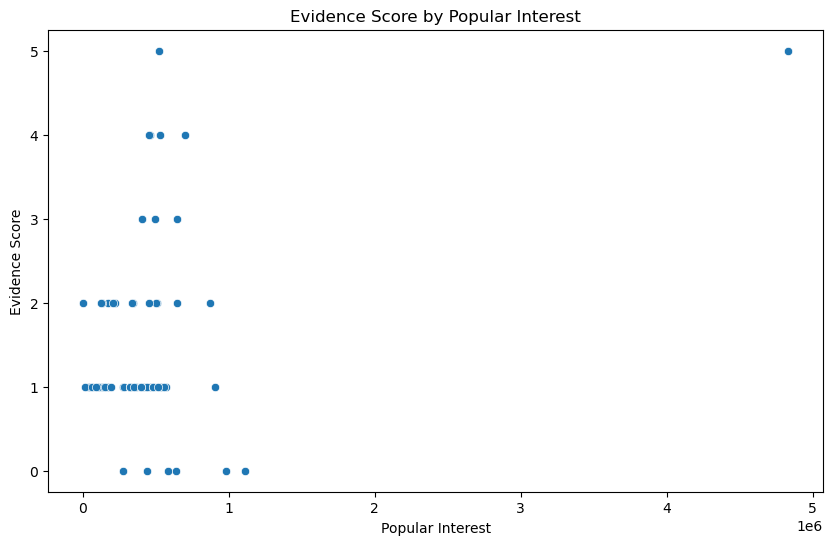

In [7]:
# Create a scatter plot of the evidence score by popular interest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popular interest', y='evidence_score', data=df, palette='viridis')
plt.title('Evidence Score by Popular Interest')
plt.xlabel('Popular Interest')
plt.ylabel('Evidence Score')
plt.show()


**The scatter plot shows the relationship between popular interest and evidence_score. Here are some observations:**

* There is no clear correlation between popular interest and evidence_score. Some conditions with high popular interest have low evidence scores, and vice versa.
* There is a cluster of conditions with high popular interest and low evidence scores (0 or 1), indicating that there are many conditions for which there is high popular interest in cannabis or CBD as a treatment, but there is no or insufficient scientific evidence for its efficacy.
* There are very few conditions with high popular interest and high evidence scores, indicating that there are few conditions for which both the popular interest and the scientific evidence for the efficacy of cannabis or CBD are high.


> Overall, the plot indicates that popular interest in cannabis or CBD as a treatment does not necessarily correlate with the strength of the scientific evidence for its efficacy.

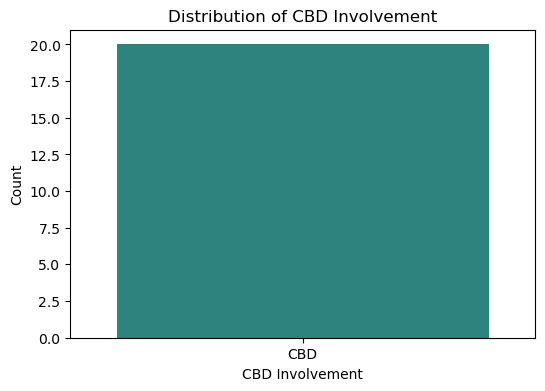

In [8]:
# Create a count plot of the CBD column
plt.figure(figsize=(6, 4))
sns.countplot(x='CBD', data=df, palette='viridis')
plt.title('Distribution of CBD Involvement')
plt.xlabel('CBD Involvement')
plt.ylabel('Count')
plt.show()


> The plot shows the distribution of conditions for which CBD is involved in the treatment. The majority of conditions in the dataset do not involve CBD in the treatment, while a smaller number of conditions involve CBD.

In [9]:
# Filter the dataframe for conditions with strong evidence (evidence_score >= 5)
strong_evidence_df = df[df['evidence_score'] >= 5]

# Display the conditions with strong evidence
strong_evidence_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']]


,health condition,health condition.1,evidence_score,simple English notes
41,Insomnia,general health,5,Large studies have shown that cannabis compoun...
50,Multiple Sclerosis (MS),neurological,5,2 studies involving a total of 790 subjects sh...


**There are two health conditions in the dataset for which there is strong evidence (evidence_score >= 5) for the efficacy of cannabis or CBD:**

* **Insomnia:** This condition falls under the general health category. There are large studies that have shown that cannabis compounds reduce the time it takes to fall asleep and increase the total amount of sleep.
* **Multiple Sclerosis (MS):** This condition falls under the neurological category. Two studies involving a total of 790 subjects showed that cannabis compounds significantly reduced muscle stiffness and pain in MS patients.

> These are the only two conditions in the dataset for which there is strong evidence for the efficacy of cannabis or CBD. For most other conditions, the evidence is either insufficient or indicates that cannabis or CBD is not effective.

In [10]:
# Filter the dataframe for conditions with no or insufficient evidence (evidence_score = 1)
no_evidence_df = df[df['evidence_score'] == 1]

# Display the first few conditions with no or insufficient evidence
no_evidence_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']].head()


,health condition,health condition.1,evidence_score,simple English notes
0,ADD/ADHD,mental health,1,Animal studies show improved social behaviour ...
4,Alzheimer’s,neurological,1,No human studies yet.
8,Autism,neurological,1,Might have some positive impact on autism-type...
9,Autoimmune Disease,immune system,1,"Potential treatment for autoimmune diseases, s..."
10,Bipolar Disorder,mental health,1,Possibly might help. But no conclusive studies...


**Here are a few health conditions from the dataset for which there is no or insufficient evidence (evidence_score = 1) for the efficacy of cannabis or CBD:**

* **ADD/ADHD:** This condition falls under the mental health category. Animal studies show improved social behavior and memory, but there is no strong evidence from human studies.
* **Alzheimer’s:** This condition falls under the neurological category. There are no human studies yet.
* **Autism:** This condition falls under the neurological category. Cannabis might have some positive impact on autism-type behaviors, but there is no strong evidence.
* **Autoimmune Disease:** This condition falls under the immune system category. Cannabis has the potential to treat autoimmune diseases, such as rheumatoid arthritis, but there is no strong evidence.
* **Bipolar Disorder:** This condition falls under the mental health category. Cannabis possibly might help, but there are no conclusive studies yet

In [11]:
# Filter the dataframe for conditions for which cannabis or CBD is harmful (evidence_score = 0)
harmful_df = df[df['evidence_score'] == 0]

# Display the conditions for which cannabis or CBD is harmful
harmful_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']]


,health condition,health condition.1,evidence_score,simple English notes
1,Adolescence,neurological,0,Use during teenage years appears to affect imp...
7,Asthma,respiratory,0,Smoking cannabis immediately expands the airwa...
20,Depression,mental health,0,No evidence it relieves depression. Heavy use ...
27,Fertility,reproductive,0,Reduces fertility in both men and women. That ...
60,Schizophrenia,mental health,0,Does not seem to reduce psychotic symptoms. In...
63,Stroke,cardiovascular,0,Numerous case reports & population studies sho...


**Here are the health conditions from the dataset for which cannabis or CBD is considered harmful (evidence_score = 0):**

* Adolescence: This condition falls under the neurological category. Using cannabis during teenage years appears to affect impulse control, working memory, and attention.
* Asthma: This condition falls under the respiratory category. Smoking cannabis immediately expands the airways but is followed by significant bronchoconstriction.
* Depression: This condition falls under the mental health category. There is no evidence that cannabis relieves depression. Heavy use might actually make depression worse.
* Fertility: This condition falls under the reproductive category. Cannabis reduces fertility in both men and women.
* Schizophrenia: This condition falls under the mental health category. Cannabis does not seem to reduce psychotic symptoms. In fact, it might increase the risk of psychosis.
* Stroke: This condition falls under the cardiovascular category. Numerous case reports and population studies show an association between cannabis use and stroke.


> These conditions indicate that cannabis or CBD is not universally beneficial and can be harmful for certain health conditions.

**Here are some key takeaways from our analysis:**

**Limited Strong Evidence:** There is limited strong evidence for the efficacy of cannabis or CBD in treating health conditions. Only two conditions, Insomnia and Multiple Sclerosis (MS), have strong evidence (evidence_score >= 5) for the efficacy of cannabis or CBD.

**No or Insufficient Evidence:** For the majority of health conditions in the dataset, there is no or insufficient evidence (evidence_score = 1) for the efficacy of cannabis or CBD. This includes conditions like ADD/ADHD, Alzheimer’s, and Autism.

**Harmful Effects:** For some health conditions, cannabis or CBD is considered harmful (evidence_score = 0). This includes conditions like Adolescence, Asthma, and Depression.

**Variation Across Categories:** There is a wide variation in the evidence for the efficacy of cannabis or CBD across different health condition categories. There is no single category where cannabis or CBD is consistently effective or harmful.

**Popular Interest vs. Scientific Evidence:** There is no clear correlation between popular interest and the strength of the scientific evidence for the efficacy of cannabis or CBD. Some conditions with high popular interest have low evidence scores, and vice versa.

**CBD Involvement:** The majority of conditions in the dataset do not involve CBD in the treatment, while a smaller number of conditions involve CBD.

> It is important to note that this analysis is based on the available data up to 2017, and there may have been more research conducted since then. Additionally, the legal status of cannabis and CBD varies by region, which may affect the availability and use of these substances for medical purposes.

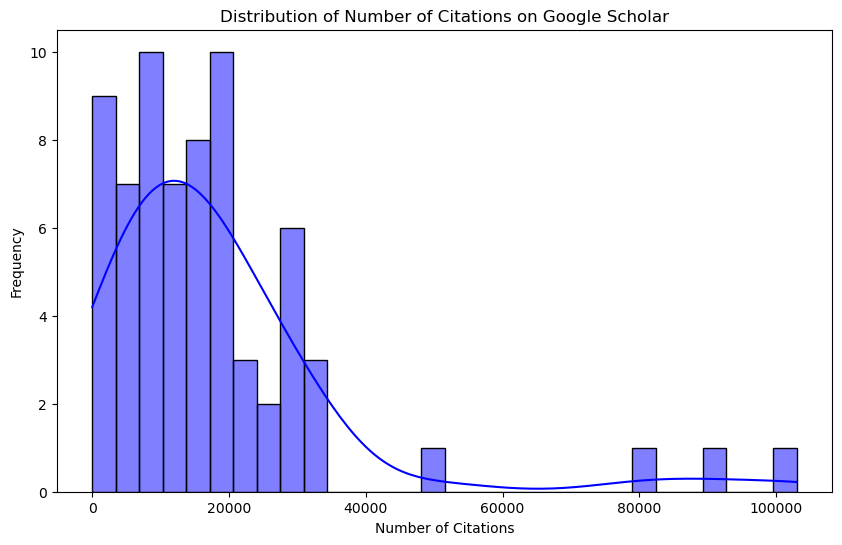

In [12]:
# Create a histogram of the number of citations on Google Scholar
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of citations on Google Scholar (2000-2017) search format: condition+cannabis'], kde=True, bins=30, color='b')
plt.title('Distribution of Number of Citations on Google Scholar')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.show()


> The histogram shows the distribution of the number of citations on Google Scholar for articles related to the condition and cannabis. The distribution is highly skewed to the right, indicating that most conditions have a relatively small number of citations, while a few conditions have a very large number of citations. This suggests that the amount of research and interest in the scientific community varies widely for different health conditions related to cannabis.

> This concludes our analysis of the dataset. We have analyzed the distribution of evidence scores, health condition categories, popular interest, CBD involvement, conditions with strong, no or insufficient, and harmful evidence, and the number of citations on Google Scholar.

***Here is a summary of our analysis:***

* **Limited Strong Evidence:** There is strong evidence for the efficacy of cannabis or CBD in treating only a few health conditions, specifically Insomnia and Multiple Sclerosis (MS).

* **No or Insufficient Evidence:** The majority of health conditions in the dataset have no or insufficient evidence for the efficacy of cannabis or CBD.

* **Harmful Effects:** Some health conditions, such as Adolescence, Asthma, and Depression, are associated with harmful effects of cannabis or CBD.

* **Variation Across Categories:** There is a wide variation in the evidence for the efficacy of cannabis or CBD across different health condition categories.

* **Popular Interest vs. Scientific Evidence:** There is no clear correlation between popular interest and the strength of the scientific evidence for the efficacy of cannabis or CBD.

* **CBD Involvement:** A smaller number of health conditions in the dataset involve CBD in the treatment.

* **Number of Citations:** The number of citations on Google Scholar for articles related to the condition and cannabis varies widely, indicating differing levels of research and interest in the scientific community for different health conditions related to cannabis.

> It is important to approach the use of cannabis or CBD for medical purposes with caution and to consider the available scientific evidence, potential side effects, and legal status in your region.